#CS 171: Homework 1
Author: Russell Semsem<br>
Solution Statement: Build a Machine Learning model to accurately predict which people are likely to develop diabetes.

#Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive

%matplotlib inline

#Load, Prepare, and Review Data

In [ ]:
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##View the Data

In [ ]:
data.shape

(768, 9)

In [ ]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.isnull().values.any()

False

##Graphical Correlation Matrix
Important to see what how pairs of columns correlate with each other. This will give us an idea if there's identical correlation and unnecessary information.

In [ ]:
def plot_corr(data, size=11):
  """
  This function plots a graphical correlation matrix
    Correlation matrix: a table that shows the correlation coefficients of how one column is related to another column.
      The correlation value is typically between -1 to 1.
        -1: Perfect negative correlation
        0: No correlation
        1: Perfect positive correlation
    Graphical: Represented as a heat map
      purple-blue-lighter blue/green-green-yellow indicates less to more correlated

  """
  corr = data.corr()
  fig, ax = plt.subplots(figsize=(size, size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)

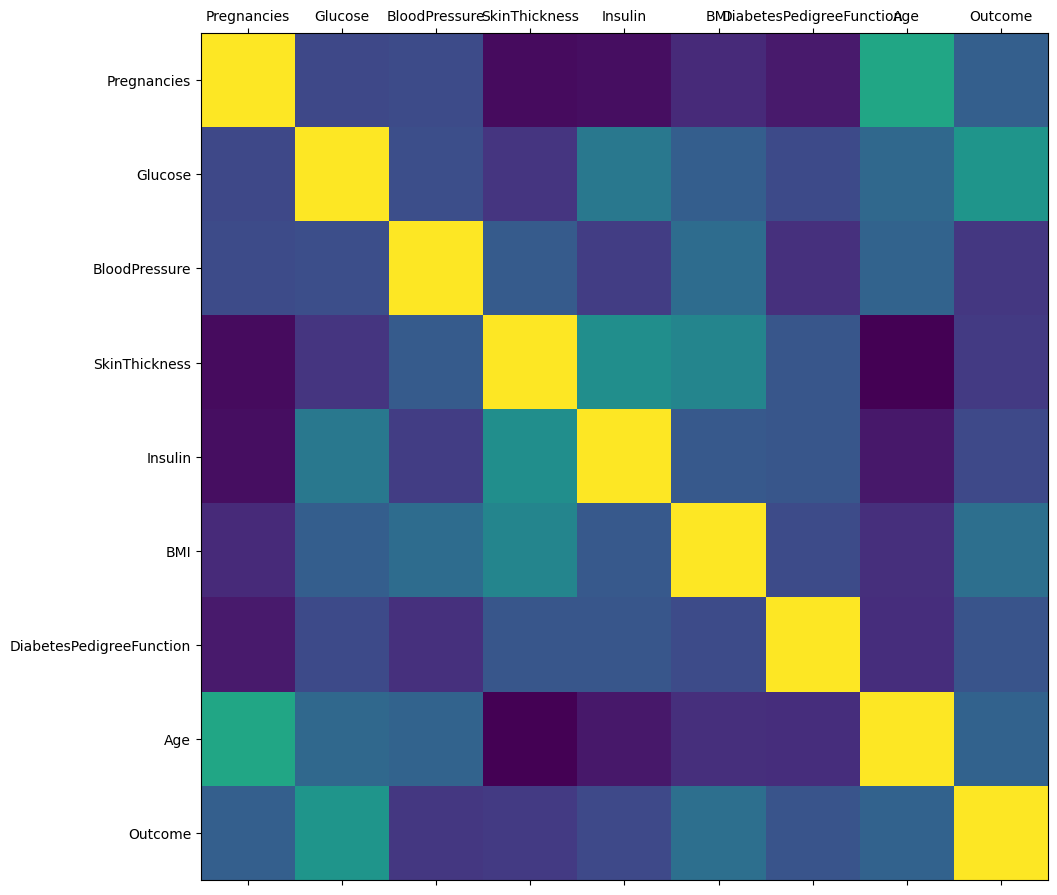

In [ ]:
plot_corr(data)

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


We can see that there is no identical coorelation between two different columns. Thus, we do not need to remove any repetitive information.

##Check Diabetes True:False Ratio

In [ ]:
num_obs = len(data)
num_true = len(data.loc[data['Outcome'] == 1])
num_false = len(data.loc[data['Outcome'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


This is a good distribution between True and False cases.

##Replace the Zero Values
There are features where 0s are not feasible in the dataset and could be replaced by the mean or median.

In [ ]:
from sklearn.impute import SimpleImputer

# Create separate Imputer instances for different strategies
mean_imputer = SimpleImputer(missing_values=0, strategy="mean")
median_imputer = SimpleImputer(missing_values=0, strategy="median")

# Define lists of column names for each strategy
cols_to_impute_with_mean = ['Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age']  # Replace zeros in these columns with the mean
cols_to_impute_with_median = ['Insulin', 'BMI']  # Replace zeros in these columns with the median
cols_to_leave_unchanged = ['Pregnancies', 'Outcome']  # Do not change zeros in these columns

# Impute data with different strategies for different columns
data[cols_to_impute_with_mean] = mean_imputer.fit_transform(data[cols_to_impute_with_mean])
data[cols_to_impute_with_median] = median_imputer.fit_transform(data[cols_to_impute_with_median])

Some features such as Insulin and BMI will have outliers, thus it is better to replace 0s with the median.

##Split The Data
70% of the prepared data will go to **training** the algorithm.<br>
30% of the prepared data will go to **testing** the algorithm.

In [ ]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class_names = ['Outcome']

X =  data[feature_col_names] #dataset of only features that is not 'diabetes'
y = data[predicted_class_names] #dataset of only 'diabetes' showing 1 or 0

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=50)

In [ ]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data.index)) * 100))

69.92% in training set
30.08% in test set


Verify Splits Are Maintained Across Datasets

In [ ]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data.loc[data['Outcome'] == 1]), (len(data.loc[data['Outcome'] == 1])/len(data.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data.loc[data['Outcome'] == 0]), (len(data.loc[data['Outcome'] == 0])/len(data.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train['Outcome'] == 1]), (len(y_train[y_train['Outcome'] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train['Outcome'] == 0]), (len(y_train[y_train['Outcome'] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test['Outcome'] == 1]), (len(y_test[y_test['Outcome'] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test['Outcome'] == 0]), (len(y_test[y_test['Outcome'] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 185 (34.45%)
Training False : 352 (65.55%)

Test True      : 83 (35.93%)
Test False     : 148 (64.07%)


The data sets are now prepared for training and testing.

#Naive Bayes Algorithm
The first Machine Learning classifier.

##Training the model

In [ ]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.values.flatten())

GaussianNB()

##Accuracy on the Training Data

In [ ]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7598



##Accuracy on the Testing Data

In [ ]:
# predict values using the training data
nb_predict_test = nb_model.predict(X_test)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.7273



##Bar Chart of the Accuracy Scores

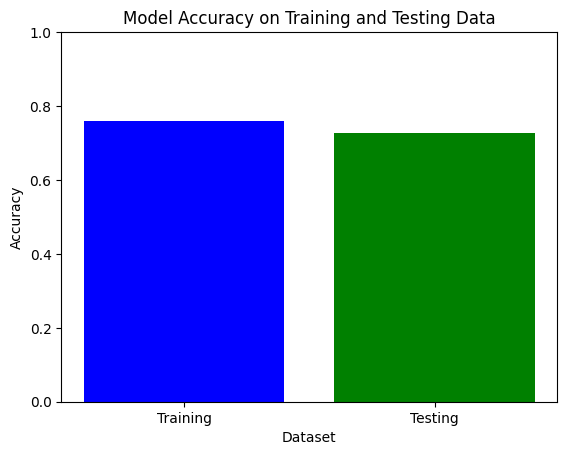

In [ ]:
# Accuracy scores
train_accuracy = metrics.accuracy_score(y_train, nb_predict_train)
test_accuracy = metrics.accuracy_score(y_test, nb_predict_test)

# Create a bar chart
labels = ['Training', 'Testing']
accuracy_scores = [train_accuracy, test_accuracy]

plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Training and Testing Data')
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1 for accuracy

plt.show()

##Confusion Matrix & Classification Report
How to interpret the confusion matrix:<br>
[[TN FP]<br>
[FN TP]]<br>
1. TN = True Negative
2. TP = True Positive
3. FN = False Negative
4. FP = False Positive

In [ ]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[123  25]
 [ 38  45]]

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       148
           1       0.64      0.54      0.59        83

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.72      0.73      0.72       231



##Heatmap of the Confusion Matrix

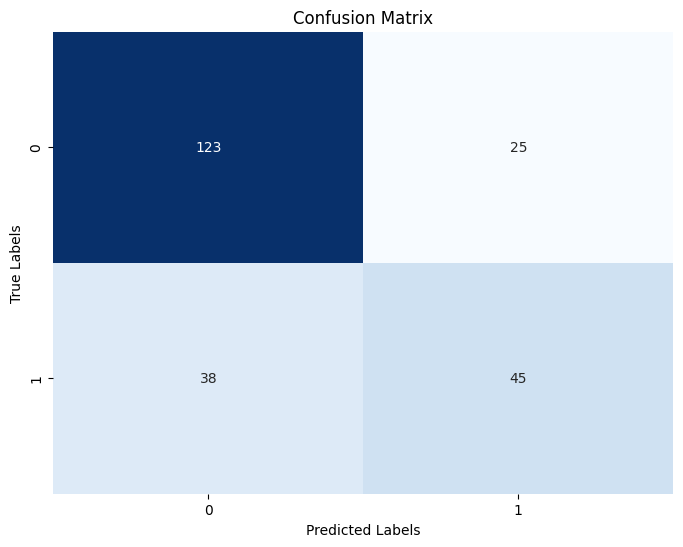

In [ ]:
# Create a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, nb_predict_test)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#Logistic Regression CV Algorithm
The second Machine Learning classifier.<br>
This algorithm uses K-fold Cross Validation to tune hyperparameters.

##Training the model

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
# set number of jobs to -1 which uses all cores to parallelize
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=50, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=1000)
lr_cv_model.fit(X_train, y_train.values.flatten())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, max_iter=1000,
                     n_jobs=-1, random_state=50, refit=False)

The test data performs 10-fold cross-validation during hyperparameter tuning. For each fold, it tries 3 different candidate values for regularization.

##Accuracy on the Training Data

In [ ]:
lr_cv_predict_train = lr_cv_model.predict(X_train)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))

Accuracy: 0.7672


##Accuracy on the Testing Data

In [ ]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))

Accuracy: 0.7186


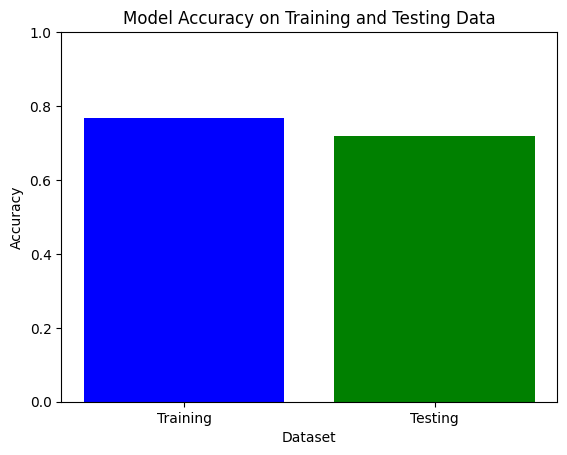

In [ ]:
# Accuracy scores
train_accuracy = metrics.accuracy_score(y_train, lr_cv_model.predict(X_train))
test_accuracy = metrics.accuracy_score(y_test, lr_cv_predict_test)

# Create a bar chart
labels = ['Training', 'Testing']
accuracy_scores = [train_accuracy, test_accuracy]

plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Training and Testing Data')
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1 for accuracy

plt.show()

##Confusion Matrix & Classification Report
How to interpret the confusion matrix:<br>
[[TN FP]<br>
[FN TP]]<br>
1. TN = True Negative
2. TP = True Positive
3. FN = False Negative
4. FP = False Positive

In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Confusion Matrix
[[117  31]
 [ 34  49]]

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       148
           1       0.61      0.59      0.60        83

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



##Heatmap of the Confusion Matrix

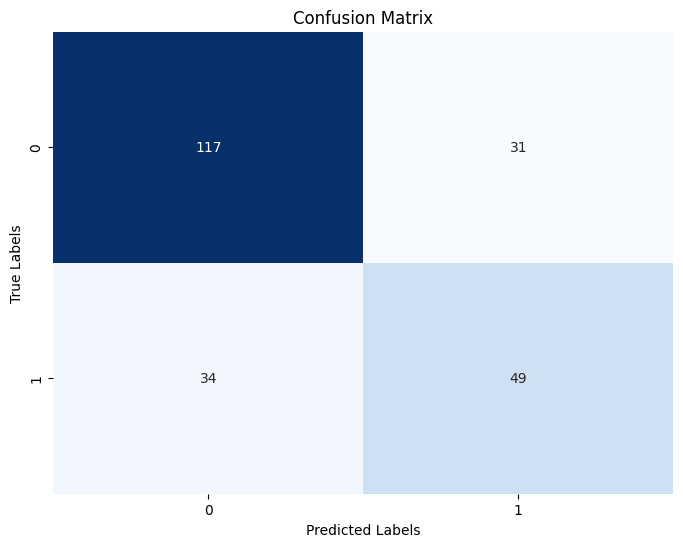

In [ ]:
# Create a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, lr_cv_predict_test)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()